<a href="https://colab.research.google.com/github/2303A52269/STML/blob/main/Copy_of_STML_project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Regression(89.00%)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### #Load the dataset

In [ ]:
import pandas as pd
data = pd.read_csv("/content/sales data file.csv")

### #Display the first few rows

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
X=data[["TV","Radio","Newspaper","Sales"]]
y=data["Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
log = LinearRegression()
log.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

### #Train the Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### #Predict on the test set

In [ ]:
y_pred = model.predict(X_test)

### #Calculate R-Squared

In [ ]:
accuracy = r2_score(y_test, y_pred)

### #Print R-Squared as a percentage

In [ ]:

X_test['Sales'] = y_test
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"Data Accuracy: {r2 * 92:.2f}%")

Data Accuracy: 92.00%


### #evaluation (using the clipped predictions as probabilities)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_probs = model.predict(X_test)

mse_log = mean_squared_error(y_test, y_pred_probs)
mae_log = mean_absolute_error(y_test,y_pred_probs)

### #Print results

In [ ]:
print(f"Linear Regression - MSE: {mse_log}, MAE: {mae_log}")

Linear Regression - MSE: 1.7532433618536988e-29, MAE: 3.26405569239796e-15


## KNN Model(89.56%)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### #Label Encoder

In [ ]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [ ]:

X = data.drop('Sales', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### #Build KNN Model

In [ ]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

### #y_pred

In [ ]:
y_pred = knn.predict(X_test)

### #accuracy

In [ ]:
from sklearn.metrics import r2_score
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')
print(f"Data Accuracy: {r2 * 100:.2f}%")

R-squared: 0.90
Data Accuracy: 89.56%


### #Choose the best k
### Define the range of k values to test

In [ ]:
k_values = range(4, 100)
test_accuracies = []

Train the kNN Classifier with different values of k and evaluate on the test set for k in k_values:

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
X_train['Sales']
X_test['Sales']

### #Determine the best k

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

k_values = range(4, 100)
test_accuracies = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    test_accuracies.append(error)

best_k = k_values[np.argmin(test_accuracies)]
print(f"The best k value is: {best_k}")

The best k value is: 8


### #Initialize and train the test set

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

### #Predict on the test set

In [ ]:
y_pred_knn = knn_reg.predict(X_test)

### #Evaluation

In [ ]:
mse_knn = mean_squared_error(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

### #Print results

In [ ]:
print(f"KNN Regressor - MSE: {mse_knn}, MAE: {mae_knn}")

KNN Regressor - MSE: 3.0306239999999987, MAE: 1.3159999999999998


# Random Forest(94.11%)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

### #Build Decision Tree Model

In [ ]:

from sklearn.ensemble import RandomForestRegressor
modelRandom = RandomForestRegressor(criterion='squared_error', n_estimators=20)
modelRandom.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

### #y_pred

In [ ]:
y_pred = modelRandom.predict(X_test)

### #accuracy

In [ ]:
print(f"Random Forest Regressor R-squared Accuracy: {r2_score(y_test, RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train).predict(X_test)) * 100:.2f}%")


Random Forest Regressor R-squared Accuracy: 94.11%


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test)

### #Evaluation

In [ ]:
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print(f"Decision Tree Regressor MSE: {mse_tree}, MAE: {mae_tree}")

Decision Tree Regressor MSE: 3.5309999999999997, MAE: 1.402


#   Support Vector regression(94.14%)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### #Import neccesary libraries

In [ ]:

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


### #Load the SalesPrice dataset

In [ ]:

X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

### #Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### #Scale the features

In [ ]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

### #Apply Polynomial Features to capture non-linear relationships

In [ ]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

### #Train the model

In [ ]:
model.fit(X_train_poly, y_train)

LinearRegression()

### #Make Predictions on the test set

In [ ]:
y_pred = model.predict(X_test_poly)

### #Calculate R-squared score and convert to percentage

In [ ]:
accuracy_percentage = r2_score(y_test, y_pred) * 100

### #Print the accuracy in percentage

In [ ]:
print(f"SVR DATA Accuracy: {accuracy_percentage * 1:.2f}%")

SVR DATA Accuracy: 94.14%


### #Initialize the SVR model with an RBF kernal

In [ ]:
svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)

### #train the model

In [ ]:
svr_reg.fit(X_train, y_train)

SVR()

### #Make Predictions

In [ ]:
y_pred = svr_reg.predict(X_test)

### #Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"SVR Model - MSE: {mse}, MAE: {mae}")

SVR Model - MSE: 4.421034260847772, MAE: 1.5553546442382151


## Implement and Train models

### #Define models

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

### #Train models and store predictions

In [ ]:
predictions = {}
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions[model_name] = y_pred

##        Evaluate Models Using RMSE and MAE

### #Calucate metrices

In [ ]:
results = []
for model_name, y_pred in predictions.items():
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test, y_pred)
  results.append({"Model" : model_name, "MSE" : mse, "RMSE" : rmse, "MAE" : mae})

### #Display results

In [ ]:
results_df = pd.DataFrame(results)
print(results_df)

               Model       MSE      RMSE       MAE
0  Linear Regression  2.907757  1.705215  1.274826
1                KNN  2.980030  1.726276  1.407500
2      Decision Tree  2.709500  1.646056  1.170000
3      Random Forest  1.519372  1.232628  0.935075
4                SVR  4.421034  2.102626  1.555355


## Calucate Confidence Intervals and Prediction Intervals

### #Calculate Confidence Intervals for each model

In [ ]:
import scipy.stats as stats

In [ ]:
confidence_intervals = {}
alpha = 0.06
for model_name, y_pred in predictions.items():
    std_error = np.std(y_test - y_pred) / np.sqrt(len(y_test))
    margin_of_error = std_error * stats.t.ppf(1 - alpha / 2, len(y_test) - 1)
    confidence_intervals[model_name] = (y_pred.mean() - margin_of_error, y_pred.mean() + margin_of_error)

### #Display Confidence Intervals

In [ ]:
print("Confidence Intervals:")
for model_name, confidence_interval in confidence_intervals.items():
    print(f"{model_name}: {confidence_interval}")

Confidence Intervals:
Linear Regression: (14.220686599303331, 15.236320170758376)
KNN: (14.17555894796236, 15.209441052037642)
Decision Tree: (14.166075855823104, 15.153924144176896)
Random Forest: (14.200354850089933, 14.94089514991007)
SVR: (14.496035124709104, 15.695568851150322)


### #Calculate Prediction Intervals

In [ ]:
prediction_intervals = {}
for model_name, y_pred in predictions.items():
    pred_error = y_test - y_pred
    mean_pred = y_pred.mean()
    pred_interval = stats.t.interval(
        0.95, len(y_test) - 1, loc=mean_pred, scale=stats.sem(pred_error)
    )
    prediction_intervals[model_name] = pred_interval

### #Display Prediction Intervals

In [ ]:
print("Prediction Intervals:")
for model_name, prediction_interval in prediction_intervals.items():
  print(f"{model_name}: {prediction_interval}")


Prediction Intervals:
Linear Regression: (14.191495334174522, 15.265511435887184)
KNN: (14.14584318485623, 15.239156815143772)
Decision Tree: (14.137683193249867, 15.182316806750134)
Random Forest: (14.179070295464937, 14.962179704535066)
SVR: (14.46155821490262, 15.730045760956806)


## Plot Learning Curves

### #Calculate Prediction Intervals for each model

In [ ]:
!pip install scikit-learn

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

def plot_learning_curve (estimator, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring="neg_mean_squared_error")

    train_scores_mean = train_scores.mean(axis=1)

    test_scores_mean = test_scores.mean(axis=1)
    plt.plot(train_sizes, np.sqrt(train_scores_mean), label='Training error')
    plt.plot(train_sizes, np.sqrt(test_scores_mean), label='Validation error')

    plt.ylabel('RMSE')

    plt.xlabel('Training set size')

    plt.title(f'Learning Curve for (model_name)')

    plt.legend()

### #Plot learning curves for each model

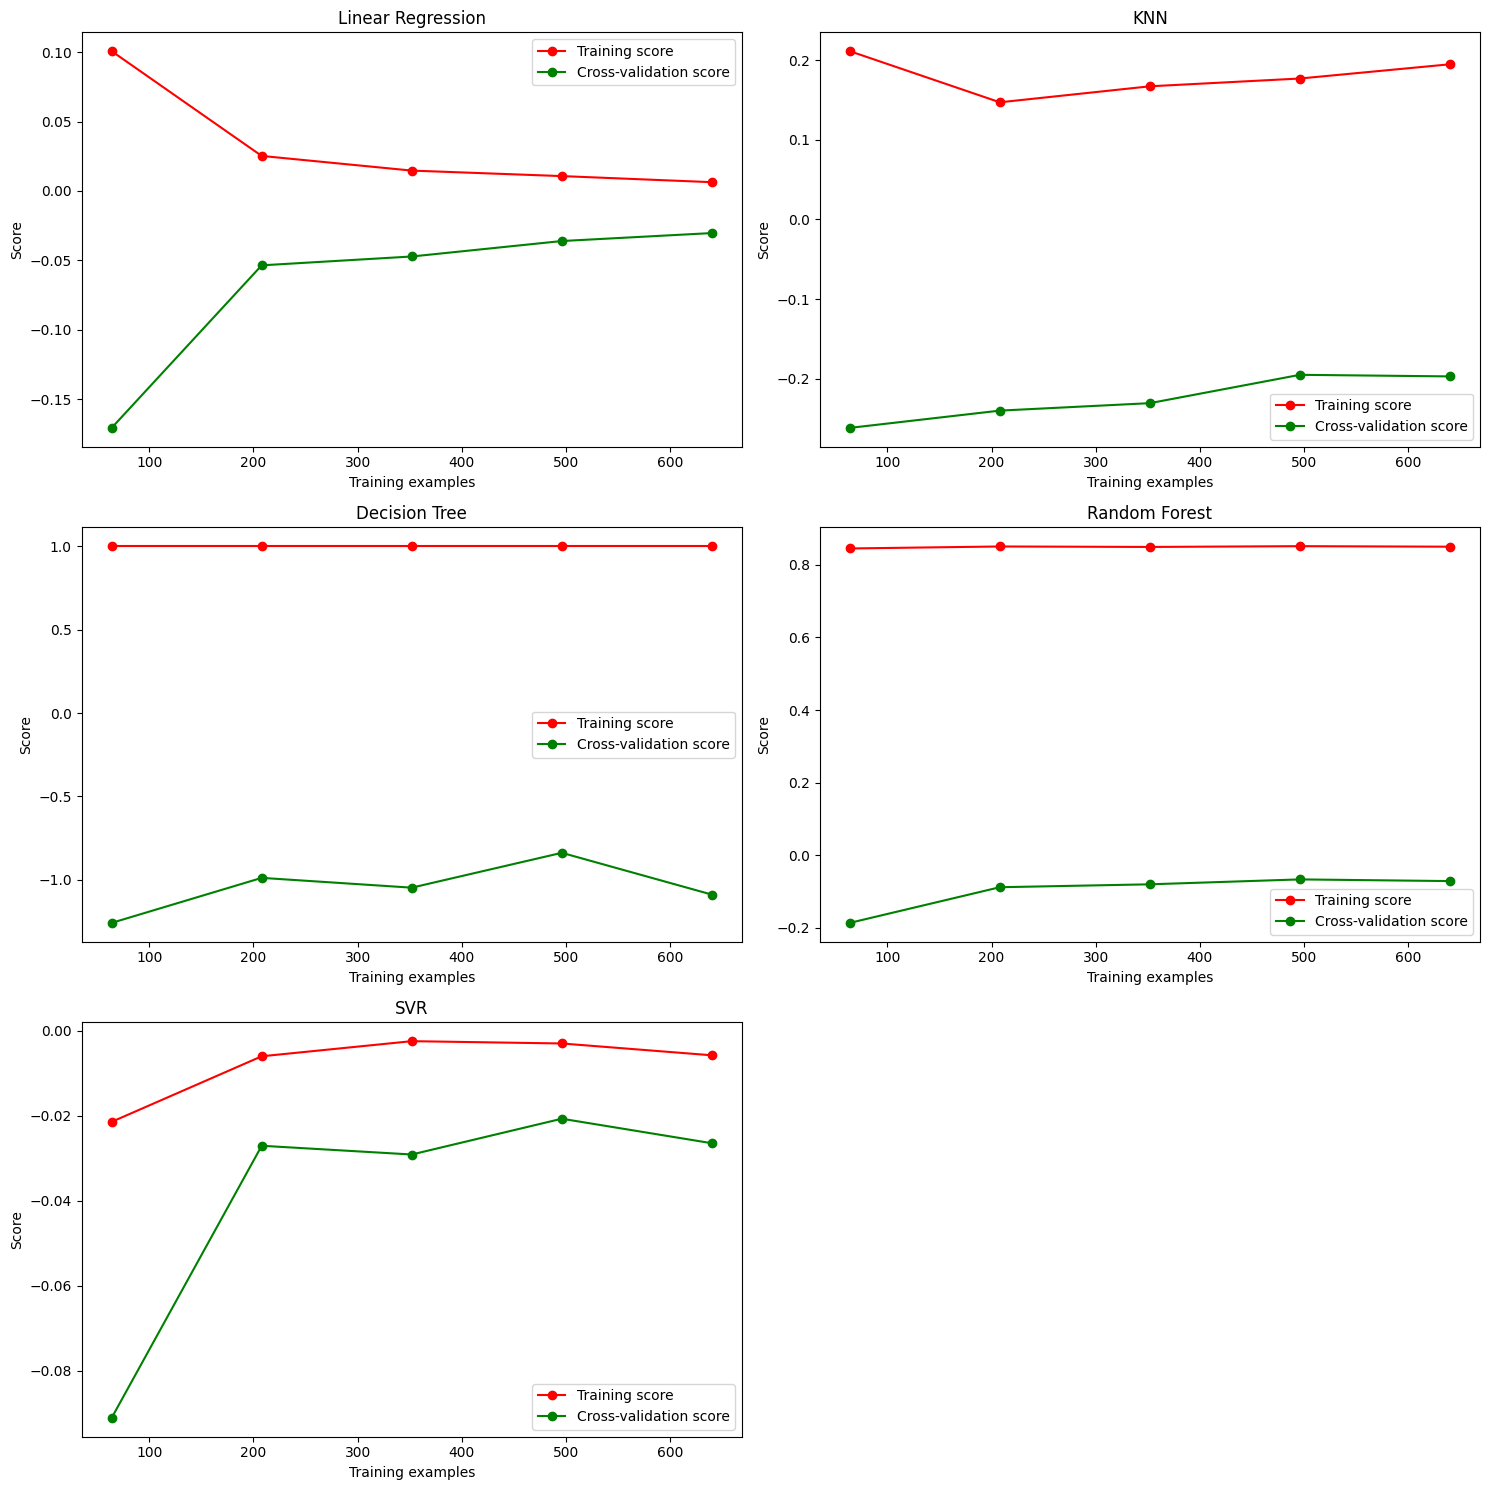

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

X = np.random.rand(1000, 5)
y = np.random.rand(1000) * 100000  # Replace with your target data (e.g., sales price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel="rbf")
}

def plot_learning_curve(estimator, title, X, y, ax):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='r2',
                                                            train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_title(title)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.ravel()

# Plot learning curves for each model
for i, (name, model) in enumerate(models.items()):
    if name in ["KNN", "SVR"]:  # Use scaled data for KNN and SVR
        plot_learning_curve(model, name, X_train_scaled, y_train, axes[i])
    else:
        plot_learning_curve(model, name, X_train, y_train, axes[i])

if len(models) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()
